In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [14]:
def phi(z, kappa, sigma, rho, theta, v0, t):
    """  following Andersen """
    beta = kappa - sigma*rho*z*1j
    d = np.sqrt(beta**2 + sigma**2*z*(z + 1j))
    g = (beta - d) / (beta + d)
    a = (kappa*theta)/(sigma**2)*((beta - d)*t - 2*np.log((1 - g*np.exp(-d*t))/(1 - g)))
    b = (beta - d)/(sigma**2)*(1 - np.exp(-d*t))/(1 - g*np.exp(-d*t))
    return np.exp(a + v0*b)

<>:28: SyntaxWarning: invalid escape sequence '\p'
<>:28: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_5679/745674141.py:28: SyntaxWarning: invalid escape sequence '\p'
  ax.set_title("$f(z)=|\phi_H(z)|$", size=18, pad=30)


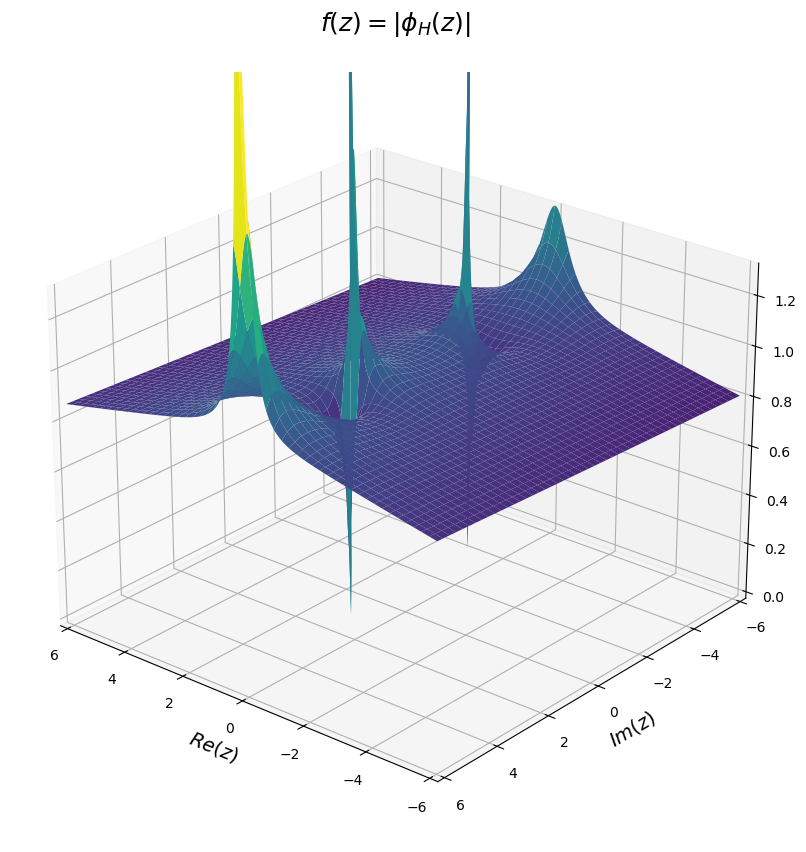

In [33]:
N = 400
lim = 6

# F0 = 110 
# K = 100
v0 = 0.0625 
kappa = 0.5
sigma = 2
rho = 0.2
theta = 0.0025
t = 0.75

x, y = np.meshgrid(np.linspace(-lim,lim,N),
                   np.linspace(-lim,lim,N))

z = x + 1j*y

f = abs(phi(z, kappa, sigma, rho, theta, v0, t))
f[f>4] = 4
f[f<-4] = -4

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection="3d", xlim=(-lim,lim), ylim=(-lim,lim), zlim=(0,1.3))

ax.plot_surface(x, y, f, cmap="viridis", shade=True, alpha=1)
ax.set_xlabel("$Re(z)$", size=14)
ax.set_ylabel("$Im(z)$", size=14)
ax.set_title("$f(z)=|\phi_H(z)|$", size=18, pad=30)
ax.view_init(azim=130, elev=25)

plt.show()